# Clustering Assignment

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

- Objective is to cluster the countries by socio-economy and health parameters.

In [173]:
# Import some usefull libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [174]:
# Data reading
df = pd.read_csv('Country-data.csv')
#pd.set_option('display.max_row', 500)

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Understanding

In [175]:
# Check null values, data types and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


(167, 10)

`exports`,`health`,`imports` are the % of per capita GDP so we will convert into the absolute amount of GDPP.

In [176]:
df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


- Univariant Analysis

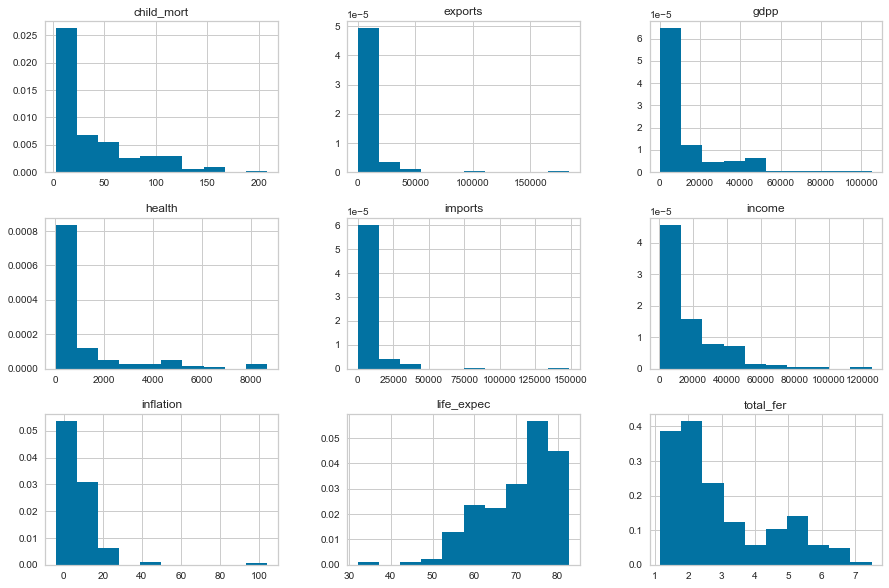

In [177]:
# Visualizing the distribution of features.
df.hist(figsize=(15,10),density=True)
plt.show()

- Bivariant analysis

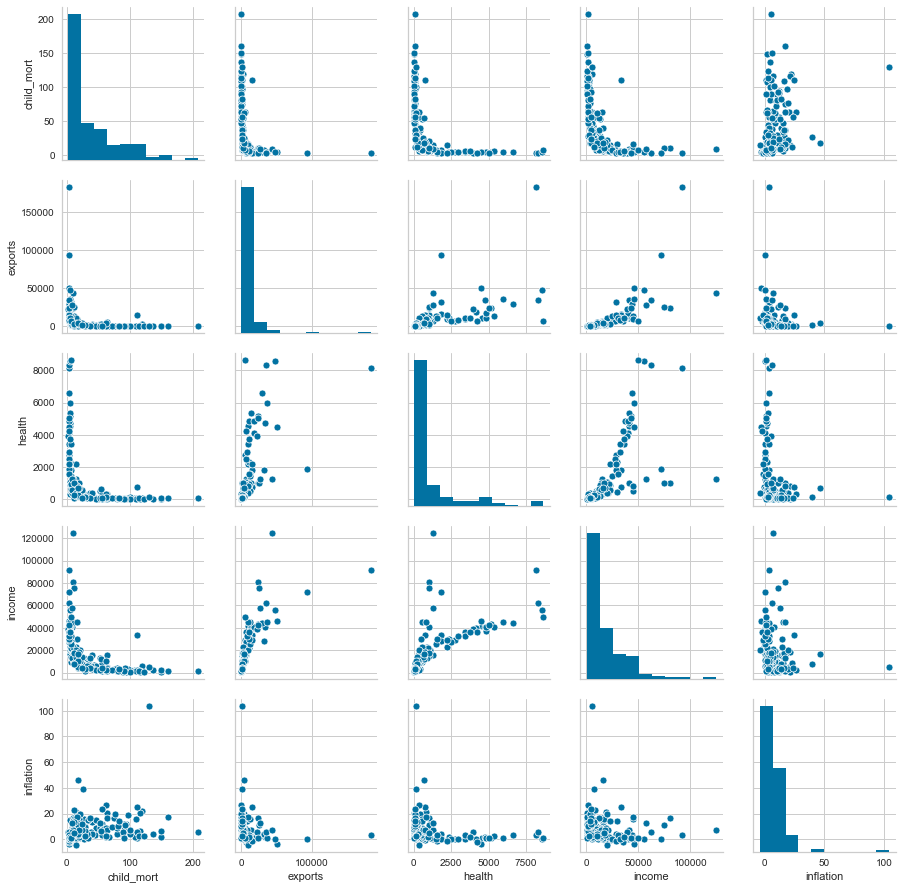

In [178]:
# Pair Plot
sns.pairplot(df[['child_mort','exports','health','income','inflation']])
plt.show()

In [179]:
# Data Description
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


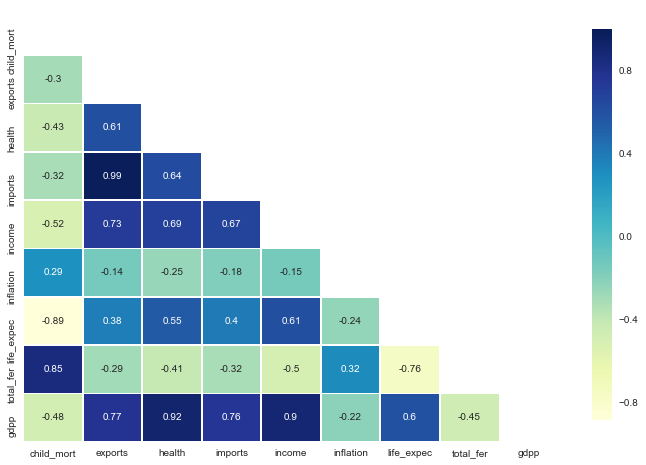

In [180]:
# looking for collinearty
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), mask=mask, annot=True,cmap="YlGnBu",ax=ax, linewidths=.7, cbar_kws={"shrink": 0.9})
plt.show()

- `income` and `gdpp` are highly positively correlated to each other by 0.9.
- Also we can observes that `child_mort` is correlated to `total_fer` by 85%. On the other hand higher the `child_mort` lower the `life_expec` which can be seen as -0.89 negative collinearity.

## Data Preparation

- Outliers Treatment

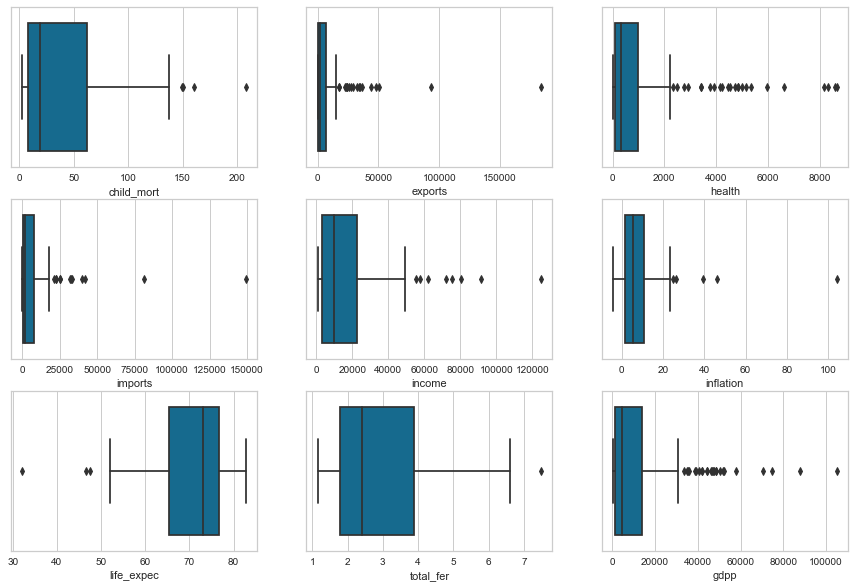

In [181]:
# Boxplot 
col = list(df.columns)
col.remove('country')

plt.figure(figsize=[15,10])
for i in enumerate(col,1):
    plt.subplot(3,3,i[0])
    sns.boxplot(x=i[1], data=df)

- Outliers Capping

In [182]:
# exports, imports, income and gdpp outliers needs to be treated
# Capping is one of the way to treat outliers without removing those particular country

exports_Q99 = df['exports'].quantile(0.99)
imports_Q99 = df['imports'].quantile(0.99)
income_Q99 = df['income'].quantile(0.99)
gdpp_Q99 = df['gdpp'].quantile(0.99)

df['exports'][df['exports']>=exports_Q99]=exports_Q99
df['imports'][df['imports']>=imports_Q99]=imports_Q99
df['income'][df['income']>=income_Q99]=income_Q99
df['gdpp'][df['gdpp']>=gdpp_Q99]=gdpp_Q99

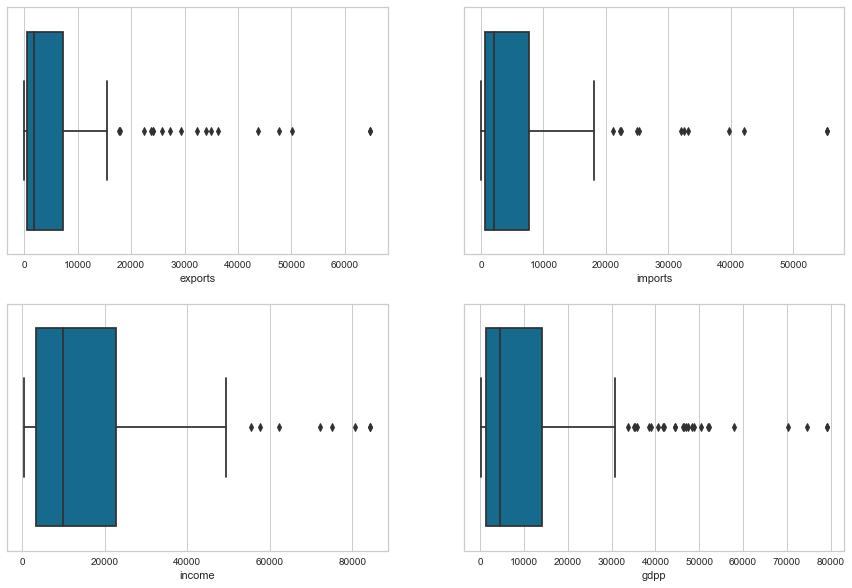

In [183]:
# Boxplot after capping outliers
col_capped =['exports','imports','income','gdpp']

plt.figure(figsize=[15,10])
for i in enumerate(col_capped,1):
    plt.subplot(2,2,i[0])
    sns.boxplot(x=i[1], data=df)

- Hopkins statistics to asses cluster tendency

In [184]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [185]:
col = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df_var = df[col]

In [186]:
hopkins(df_var)

0.8869667083094992

- Data Standardization

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_var)

In [188]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns=col

## Clustering

### K-Means Clustering

- Find optimum cluster number

1. Elbow Method - Sum of Square

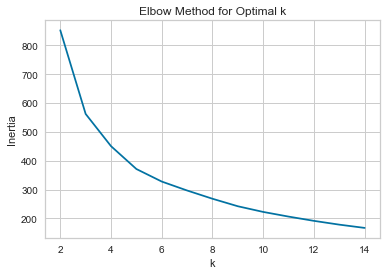

In [189]:
from sklearn.cluster import KMeans
ssd = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(range(2,15),ssd)
plt.title('Elbow Method for Optimal k')
plt.ylabel('Inertia')
plt.xlabel('k')
plt.show()

Either k=3 or K=5 seems considerable cluster.

2. Average Silhouette Method

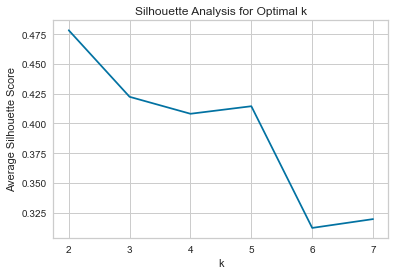

In [190]:
# silhouette analysis
from sklearn.metrics import silhouette_score
sil_avg=[]
for i in range(2,8):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sil_avg.append(silhouette_avg)
plt.plot(range(2,8),sil_avg)
plt.title('Silhouette Analysis for Optimal k')
plt.ylabel('Average Silhouette Score')
plt.xlabel('k')
plt.show()

- Visualize the density and separation of clusters

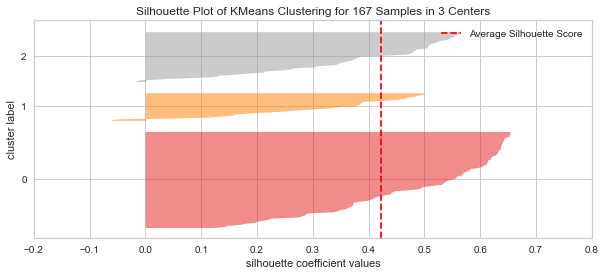

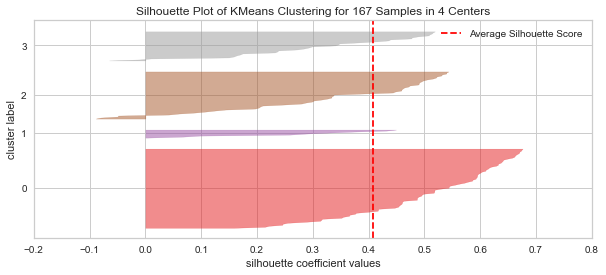

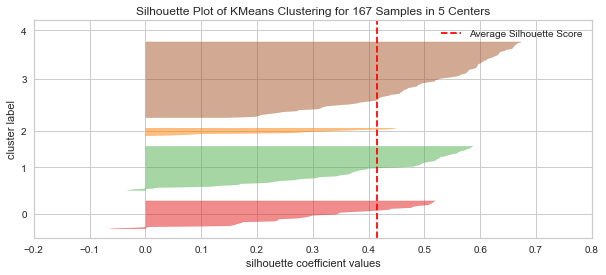

In [191]:
from yellowbrick.cluster import SilhouetteVisualizer
n=[3,4,5]
for i in n:
    plt.figure(figsize=(10,4))
    model=KMeans(n_clusters=i, init='k-means++', random_state=100)
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(df_scaled)
    visualizer.poof()

KMeans cluster with 3 center showing kind of homogeneous with high Silhouette score. 
Cluster model with k=5 having 2 small cluster with low score and small observations.

- K-Means clustering 

In [192]:
# From above visualization, k=3 can be considered for labeling our data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [193]:
# Cluster lable to the country
df_km = df.copy()
df_km['cluster']=kmeans.labels_

In [194]:
# Count per cluster
df_km['cluster'].value_counts()

0    92
2    48
1    27
Name: cluster, dtype: int64

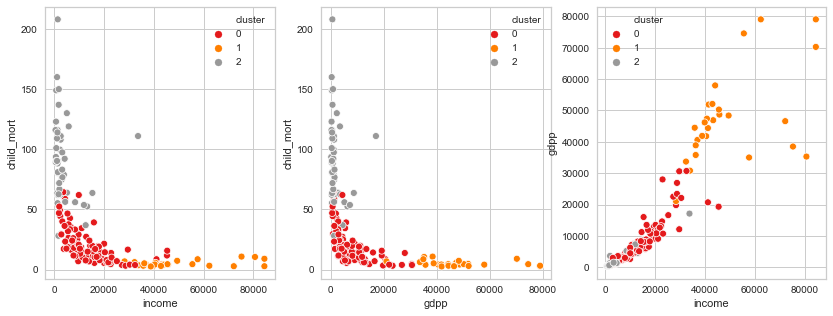

In [195]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster', 
                legend = 'full', data = df_km, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster', 
                legend = 'full', data = df_km, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster', 
                legend = 'full', data = df_km, palette='Set1')
plt.show()

- Cluster Profiling

In [196]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [197]:
# Groupby cluster and mean of numeric attributes
df_km.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565
1,5.092593,26440.026667,4378.955185,22045.851111,49057.333333,3.120407,80.462963,1.775185,47476.888889
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333


- From mean values we can observe that cluster label 2 has high `child_mort`,`inflation`,`total_fer` while average `income`,`export`,`gdpp` are lower compare to cluster 0 and 1

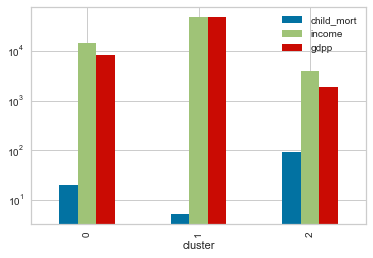

In [198]:
# Bar plot of mean child_mort, income, gdpp by grouping on cluster
df_km[['child_mort','income','gdpp','cluster']].groupby('cluster').mean().plot(kind='bar',logy=True)
plt.show()

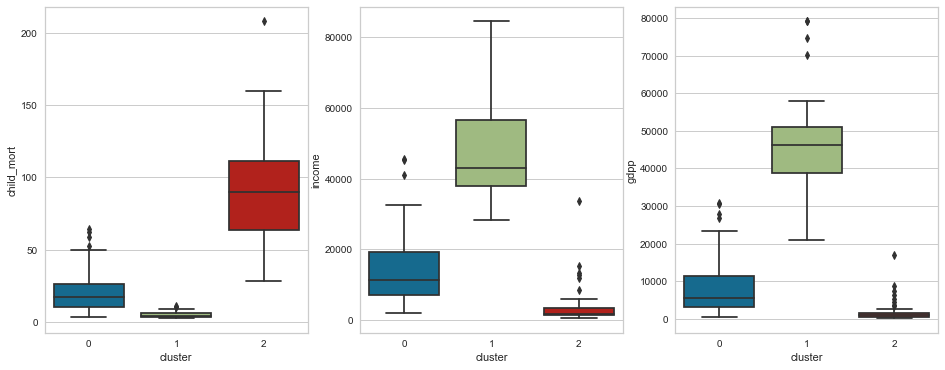

In [199]:
#Boxplot
plt.figure(figsize=(16,6))
for i in enumerate(['child_mort','income','gdpp'],1):
    plt.subplot(1,3,i[0])
    sns.boxplot(x='cluster', y=i[1], data=df_km)
    
plt.show()

Also, from graph we can see that cluster 2 has high child mortality against low per capita income and GDP.

In [200]:
# Sort 5 countries from cluster 2 by child mortality, income and gdpp
df_km[df_km['cluster']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,2


- **From K-Means clustering Haiti, Sierra Leone, Chad, Central African Republic and Mali are most likely to choose for aid**

### Hierarchical clustering

In [201]:
import scipy.cluster.hierarchy as sch

In [202]:
# Main DataFrame
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [203]:
# Standardized data
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.565040,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.439218,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.484826,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.532363,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178771,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


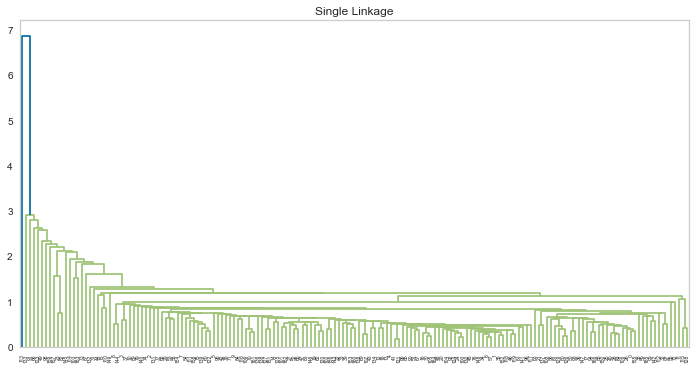

In [204]:
#single linkage
merging = sch.linkage(df_scaled, method='single', metric='euclidean')
plt.figure(figsize=(12,6))
sch.dendrogram(merging)
plt.grid(False)
plt.title('Single Linkage')
plt.show()

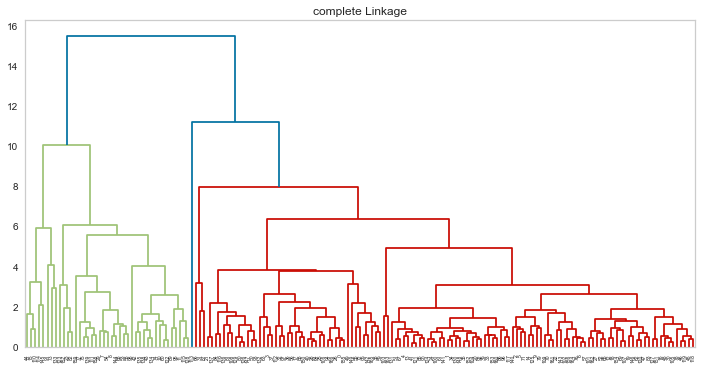

In [205]:
# complete linkage
fig=plt.figure(figsize=(12,6))
merging = sch.linkage(df_scaled, method='complete', metric='euclidean')
sch.dendrogram(merging)
plt.grid(False)
plt.title('complete Linkage')
plt.show()

In [206]:
df_h = df.copy()

In [207]:
# Cut tree at k= 4, magnitude between 8-10 in dendrogram
cluster = sch.cut_tree(merging, n_clusters=4).reshape(-1, )
cluster

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [208]:
# Assign cluster number to countries
df_h['cluster'] = cluster
df_h.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


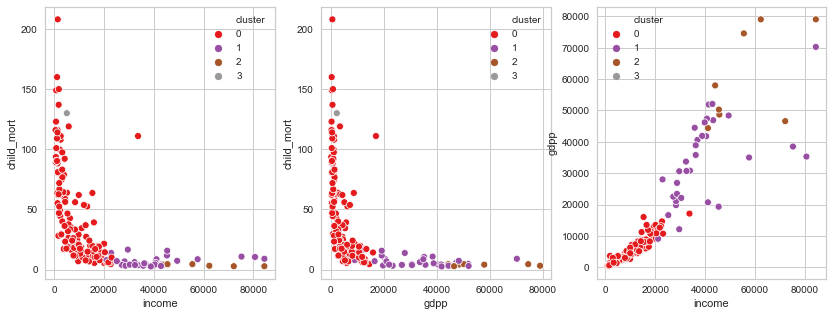

In [209]:
# Scatter plot to visualize cluster formation
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster', 
                legend = 'full', data = df_h, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster', 
                legend = 'full', data = df_h, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster', 
                legend = 'full', data = df_h, palette='Set1')
plt.show()

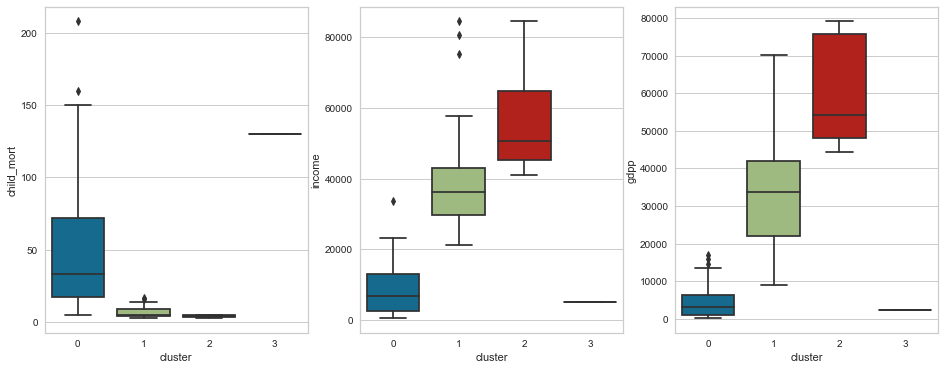

In [210]:
#Boxplot
plt.figure(figsize=(16,6))
for i in enumerate(['child_mort','income','gdpp'],1):
    plt.subplot(1,3,i[0])
    sns.boxplot(x='cluster', y=i[1], data=df_h)
    
plt.show()

here, cluster 0 falls under the same cluster trend which we have identified in K-Means clustering

In [211]:
# sorting
df_h[df_h['cluster']==0].sort_values(by=['child_mort','income','gdpp'],
                               ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,0


After hierarchical clustering, sorted countries are same as K-Means clustering which are  Haiti, Sierra Leone, Chad, Central African Republic and Mali.

by using socio-economic and health factors of all countries we can suggest that **Haiti, Sierra Leone, Chad, Central African Republic and Mali** should be prioritized for aid operational projects.